<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/0-xgb-Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### XGBoosting

https://nbviewer.jupyter.org/github/jphall663/interpretable_machine_learning_with_python/blob/master/xgboost_pdp_ice.ipynb?flush_cache=trueXGBoosting


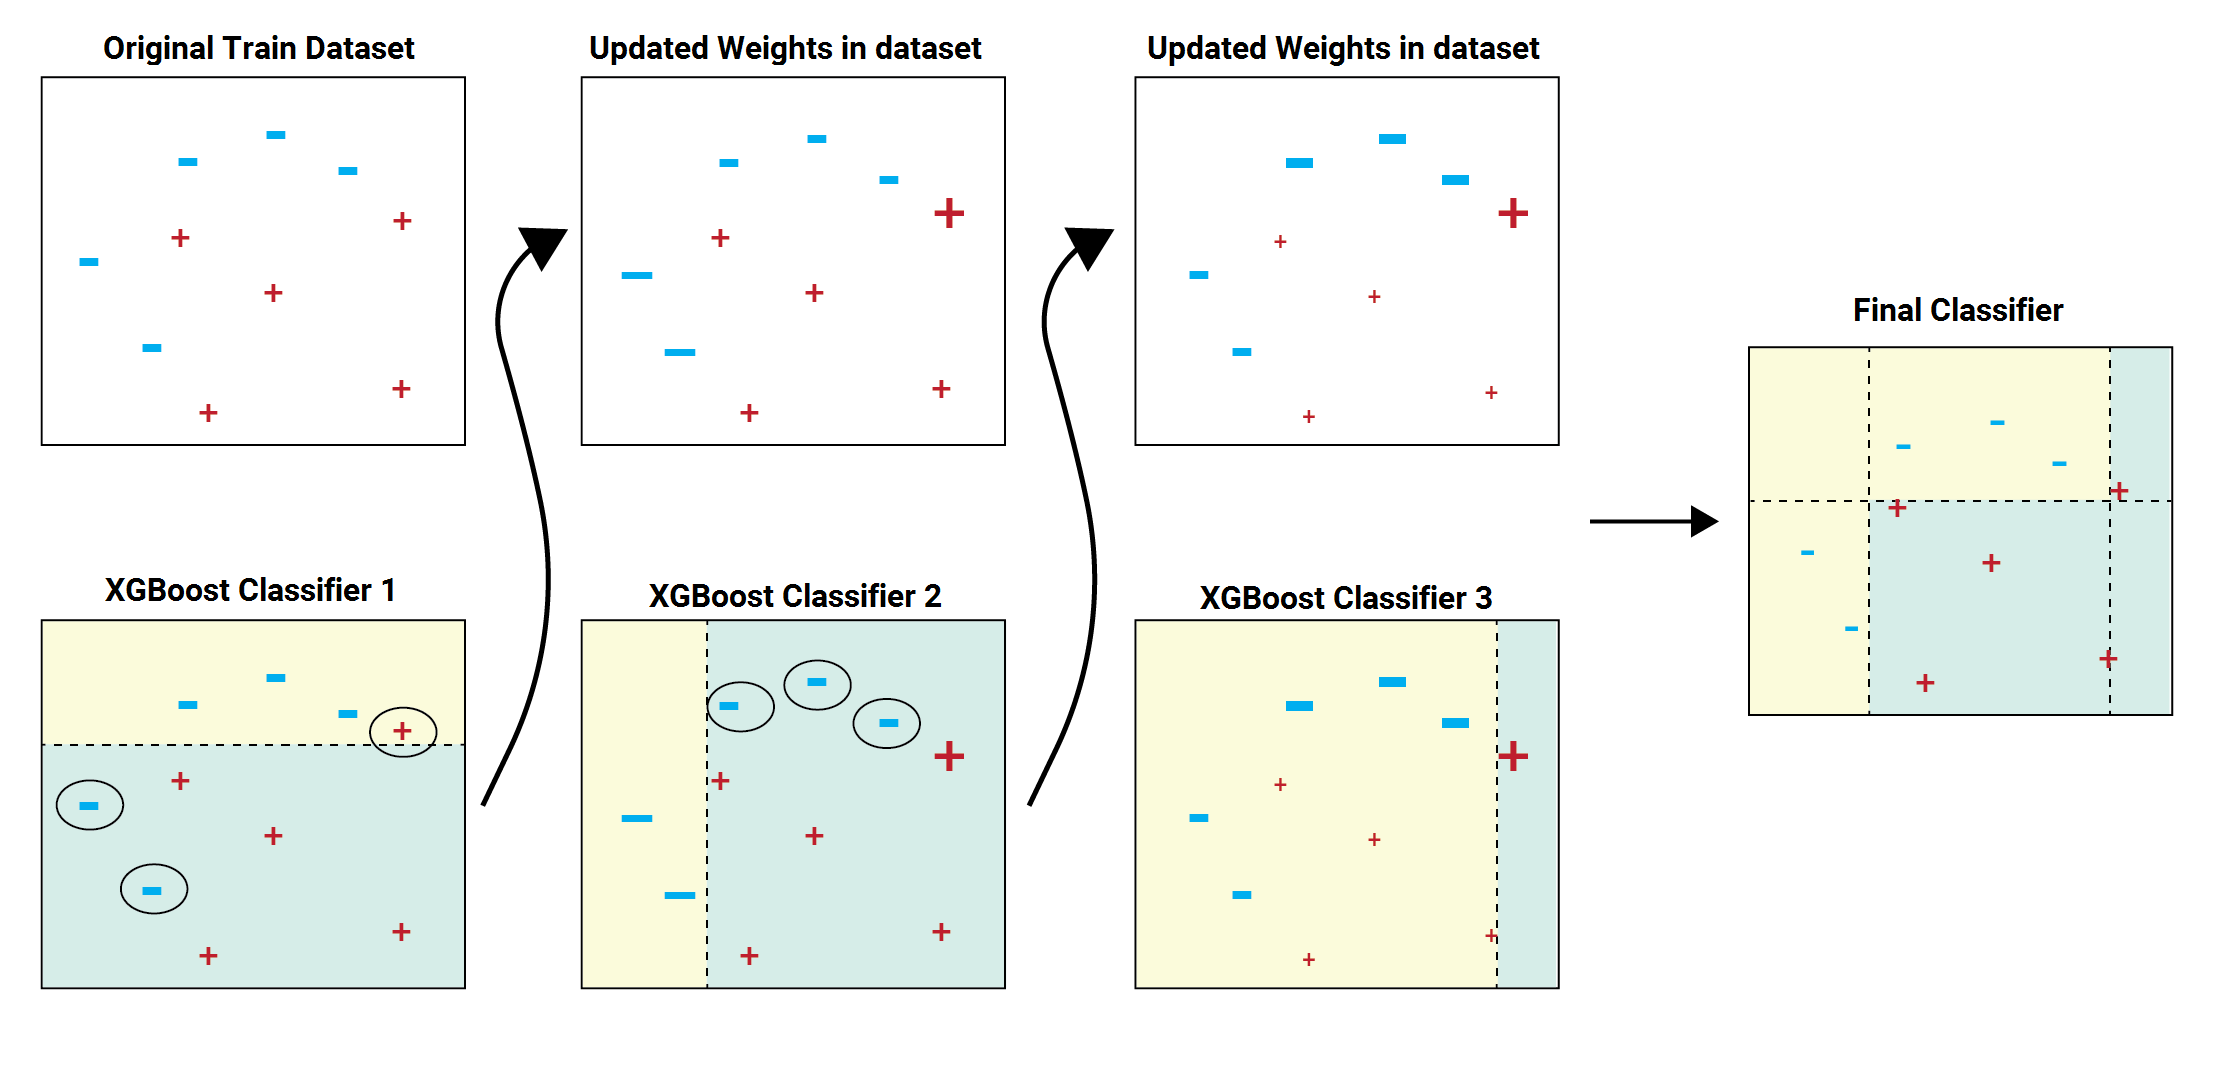

In [1]:
import numpy as np                   # array, vector, matrix calculations
import pandas as pd                  # DataFrame handling

#### Import data and clean

In [2]:
df = pd.read_csv('credit_cards_dataset.csv')

In [3]:
X = df.drop(['ID', 'default.payment.next.month'], axis=1).values

In [4]:
Y = df['default.payment.next.month'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Setting Parameter
https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [7]:
import xgboost as xgb                # gradient boosting machines (GBMs)

In [8]:
# XGBoost Regressor

mod = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=42,
    verbosity=1
)

In [10]:
mod.fit(X_train, Y_train)

[20:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [12]:
ypred = mod.predict(X_test)

In [13]:
ypred.reshape(-1,1)

array([[0.17590505],
       [0.0709337 ],
       [0.16457653],
       ...,
       [0.11827859],
       [0.08784166],
       [0.0706526 ]], dtype=float32)

In [16]:
import math
from sklearn.metrics import mean_squared_error

In [18]:
rmse = math.sqrt(mean_squared_error(Y_test, ypred))
print(rmse)

0.36741936734731157


In [19]:
predictions = np.rint(ypred)

In [20]:
predictions.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [21]:
predictions.sum()

1053.0

In [22]:
predictions.shape

(9000,)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

accuracy = accuracy_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

In [24]:
print(accuracy)
print(cm)
print(precision)
print(recall)

0.8218888888888889
[[6692  348]
 [1255  705]]
0.6695156695156695
0.3596938775510204


In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6692  348]
 [1255  705]]


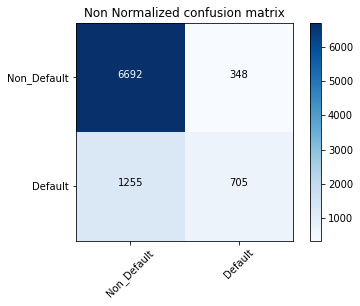

In [26]:
plt.figure()
plot_confusion_matrix(cm, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')
#plt.show()